In [1]:
# Import libraries
import requests, json
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
# using Postman we found that the list comes from a json file
url = 'https://www.timeshighereducation.com/sites/default/files/the_data_rankings/world_university_rankings_2018_limit0_369a9045a203e176392b9fb8f8c1cb2a.json'
r = requests.get(url)
universityJson = json.loads(r.text)

In [3]:
# Let's get the top 200 and display the top 5
pd.set_option('display.max_columns', 500)
top200 = pd.DataFrame(universityJson['data'])[:200]
top200.head()

,aliases,location,member_level,name,nid,rank,rank_order,record_type,scores_citations,scores_citations_rank,scores_industry_income,scores_industry_income_rank,scores_international_outlook,scores_international_outlook_rank,scores_overall,scores_overall_rank,scores_research,scores_research_rank,scores_teaching,scores_teaching_rank,stats_female_male_ratio,stats_number_students,stats_pc_intl_students,stats_student_staff_ratio,subjects_offered,url
0,University of Oxford,United Kingdom,0,University of Oxford,468,1,10,master_account,99.1,15,63.7,169,95.0,24,94.3,10,99.5,1,86.7,5,46 : 54,"20,409",38%,11.2,"Archaeology,Art, Performing Arts & Design,Biol...",/world-university-rankings/university-oxford
1,University of Cambridge,United Kingdom,0,University of Cambridge,470,2,20,master_account,97.5,29,51.5,260,93.0,35,93.2,20,97.8,3,87.8,3,45 : 55,"18,389",35%,10.9,"Archaeology,Architecture,Art, Performing Arts ...",/world-university-rankings/university-cambridge
2,California Institute of Technology caltech,United States,0,California Institute of Technology,128779,=3,30,private,99.5,10,92.6,51,59.7,322,93.0,30,97.5,4,90.3,1,31 : 69,"2,209",27%,6.5,"Architecture,Biological Sciences,Business & Ma...",/world-university-rankings/california-institut...
3,Stanford University,United States,11,Stanford University,467,=3,40,private,99.9,4,60.5,189,77.6,162,93.0,40,96.7,5,89.1,2,42 : 58,"15,845",22%,7.5,"Archaeology,Architecture,Art, Performing Arts ...",/world-university-rankings/stanford-university
4,Massachusetts Institute of Technology,United States,0,Massachusetts Institute of Technology,471,5,50,private,100.0,1,88.4,63,87.6,81,92.5,50,91.9,9,87.3,4,37 : 63,"11,177",34%,8.7,"Architecture,Art, Performing Arts & Design,Bio...",/world-university-rankings/massachusetts-insti...


In [4]:
locationData = pd.DataFrame()
for index, row in top200.iterrows():
    nid = row['nid']
    #comparisonLink = 'https://www.timeshighereducation.com/sites/default/files/university/comparison/'+str(nid)+'.json'
    #rankingsLink = 'https://www.timeshighereducation.com/sites/default/files/university/rankings/'+str(nid)+'.json'
    locationLink = 'https://www.timeshighereducation.com/sites/default/files/institution_markers/gmap_'+str(nid)+'.json'
    rLocation = requests.get(locationLink)
    if rLocation.ok:
        locationJson = json.loads(rLocation.text)
        locationDF = pd.DataFrame(locationJson)
        locationData = locationData.append(locationDF, ignore_index=True)
 
locationData.head()

,country,lat,lng,locality,path,postal_code,thoroughfare,title
0,United Kingdom,51.757701873800,-1.263959050200,Oxford,node/468,OX1 2JD,University Offices,University of Oxford
1,United Kingdom,52.204959869400,0.116093002300,Cambridge,node/470,CB2 1TN,The Old Schools,University of Cambridge
2,United States,34.135951995900,-118.125633239700,Pasadena,node/128779,91125,1200 East California Boulevard,California Institute of Technology
3,United States,37.427658081100,-122.170066833500,Stanford,node/467,94305–2004,450 Serra Mall,Stanford University
4,United States,42.360091000000,-71.094160000000,Cambridge,node/471,02139-4307,77 Massachusetts Avenue,Massachusetts Institute of Technology


In [5]:
# Add location data to top200 dataframe
locationData = locationData.rename(columns={'title':'name'})
top200 = pd.merge(top200, locationData, on='name')

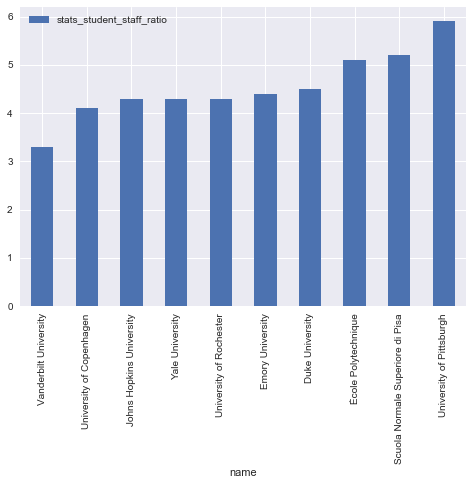

In [6]:
# Which are the best universities in term of: (a) ratio between faculty members and students
# The stats_student_staff_ratio values seem to be stored as str so let's fix it
top200.stats_student_staff_ratio = top200.stats_student_staff_ratio.apply(pd.to_numeric)
# Sort based on the ratio (lower better) and take the top 10
topfacultyratio = top200.sort_values('stats_student_staff_ratio',ascending=True)[:10][['name','stats_student_staff_ratio']]

topfacultyratio[:10].plot(x='name',y='stats_student_staff_ratio', kind='bar')
plt.show()



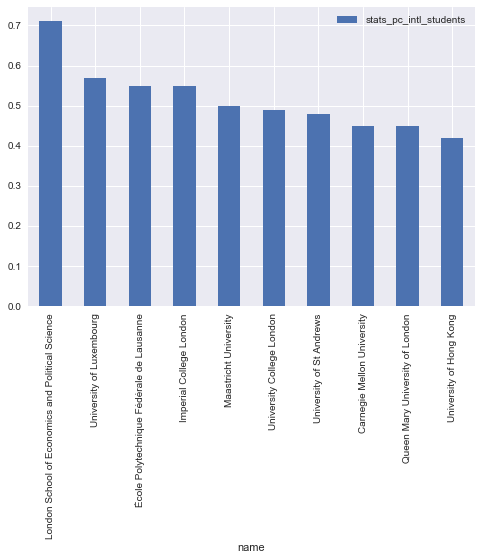

In [7]:
# Which are the best universities in term of: (b) ratio of international students
# The stats_pc_intl_students is stored as percentage, let's make it ratio
def p2f(x):
    if type(x) == str:
        return float(x.strip('%'))/100
    elif type(x) == float:
        return x
    else:
        raise('Not correct type')

top200.stats_pc_intl_students = top200.stats_pc_intl_students.apply(p2f)
# Sort based on the ratio (higher better) and take top 10
topintlstudents = top200.sort_values('stats_pc_intl_students',ascending=False)[:10][['name','stats_pc_intl_students']]

topintlstudents[:10].plot(x='name',y='stats_pc_intl_students', kind='bar')
plt.show()

In [8]:
# Answer the previous question aggregating the data by (c) country
# Group student staff ratio by country and take the mean
topFacultyRatioCountries = top200.groupby('country')['stats_student_staff_ratio'].mean()
# Take the top ten (lower better)
topFacultyRatioCountries = topFacultyRatioCountries.sort_values(ascending=True)[:10]

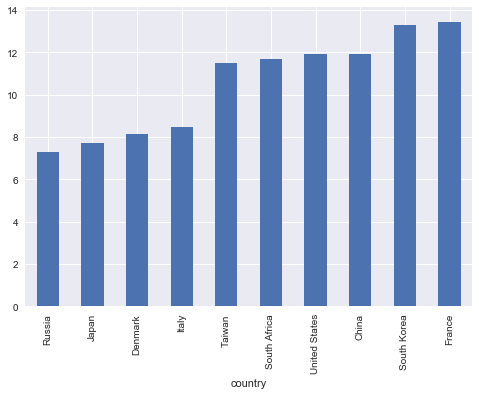

In [9]:
topFacultyRatioCountries.plot(x='country',kind='bar')
plt.show()

In [10]:
# And the same for the international student ratio
topInternationalStudentCountries = top200.groupby('country')['stats_pc_intl_students'].mean()
# Take the top ten (higher better)
topInternationalStudentCountries = topInternationalStudentCountries.sort_values(ascending=False)[:10]

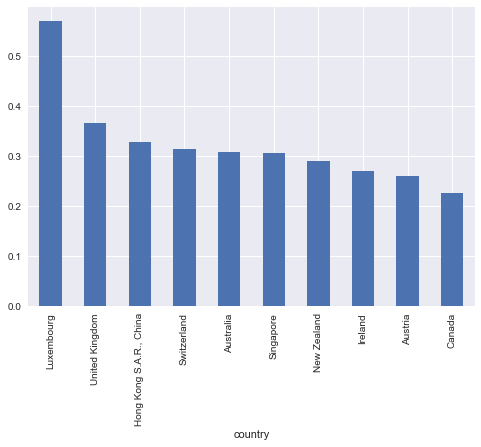

In [11]:
topInternationalStudentCountries.plot(x='country',kind='bar')
plt.show()

In [12]:
# We do the same by region (locality)
topFacRatLoc = top200.groupby(['country','locality'])['stats_student_staff_ratio'].mean()
topFacRatLoc = topFacRatLoc.sort_values(ascending=True)[:10]
topIntlStudentLoc = top200.groupby(['country','locality'])['stats_pc_intl_students'].mean()
topIntlStudentLoc = topIntlStudentLoc.sort_values(ascending=False)[:10]


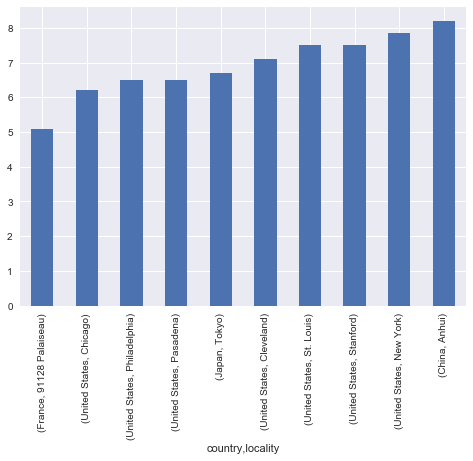

In [13]:
topFacRatLoc.plot(x=['country','locality'],kind='bar')
plt.show()

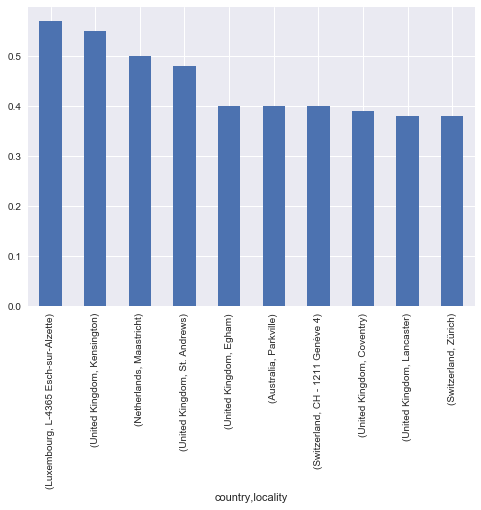

In [14]:
topIntlStudentLoc.plot(x=['country','locality'],kind='bar')
plt.show()

In [15]:
def import_json(url):
    r = requests.get(url)
    universityJson = json.loads(r.text)
    top200 = pd.DataFrame(universityJson['data'])[:200] #import the top200 universities
    return top200

def import_details_qs(top200): #requires special handling as international stud/fac data not available
    Intl_Data = pd.DataFrame()
    for index, row in top200.iterrows():
        nid = row['nid']
        Intl_link = 'https://www.topuniversities.com/node/'+str(nid)
        rIntl = requests.get(Intl_link)
        
        if rIntl.ok:
            page_body = rIntl.text
            soup = BeautifulSoup(page_body, 'html.parser')
            #Total n - faculty
            try :
                t_faculty = soup.find_all('div', class_='total faculty')[0].find('div', class_='number').text
                tot_fac_value = int(t_faculty[1:-1].replace(',',''))
            except:
                tot_fac_value = 0
            #Total n - international faculty
            try:
                t_interfaculty = soup.find_all('div',class_='inter faculty')[0].find('div',class_='number').text
                tot_intfac_value = int(t_interfaculty[1:-1].replace(',',''))
            except:
                tot_intfac_value = 0
            #Total n - students
            try:
                t_stud = soup.find_all('div', class_='total student')[0].find('div', class_='number').text
                tot_stud_value = int(t_stud[1:-1].replace(',',''))
            except:
                tot_stud_value = 0
            #Total n - international students
            try:
                t_intstud = soup.find_all('div', class_='total inter')[0].find('div', class_='number').text
                tot_intstud_value = int(t_intstud[1:-1].replace(',',''))
            except:
                tot_intstud_value = 0
            IntlDF = pd.DataFrame({'nid' : [nid],'total_faculty_members' : [tot_fac_value], 'international_faculty_members' : [tot_intfac_value], 'total_students' : [tot_stud_value], 'international_students' : [tot_intstud_value]})
            Intl_Data = Intl_Data.append(IntlDF, ignore_index=True)
    return Intl_Data

def import_details_times(top200):
    # Get the supplementary data from the university page
    locationData = pd.DataFrame()
    for index, row in top200.iterrows():
        nid = row['nid']
        #comparisonLink = 'https://www.timeshighereducation.com/sites/default/files/university/comparison/'+str(nid)+'.json'
        #rankingsLink = 'https://www.timeshighereducation.com/sites/default/files/university/rankings/'+str(nid)+'.json'
        locationLink = 'https://www.timeshighereducation.com/sites/default/files/institution_markers/gmap_'+str(nid)+'.json'
        rLocation = requests.get(locationLink)
        if rLocation.ok:
            locationJson = json.loads(rLocation.text)
            locationDF = pd.DataFrame(locationJson)
            locationData = locationData.append(locationDF, ignore_index=True)
    # Add location data to top200 dataframe
       #locationData = locationData.rename(columns={'title':'name'})
    #top200 = pd.merge(top200, locationData, on='name')
    return locationData

In [16]:
## QS International Rankings

In [17]:
%%time
top200_qs = import_json('https://www.topuniversities.com/sites/default/files/qs-rankings-data/357051.txt?_=1508492427994')
data_qs = import_details_qs(top200_qs)

CPU times: user 2min, sys: 3.41 s, total: 2min 3s
Wall time: 3min 5s


In [18]:
top200_qs_full = pd.merge(top200_qs, data_qs, on='nid')
top200_qs_full.rename(columns={'title':'name'})
top200_qs_full.head()

,cc,core_id,country,guide,logo,nid,rank_display,region,score,stars,title,url,international_faculty_members,international_students,total_faculty_members,total_students
0,US,410,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",294850,1,North America,100,6,Massachusetts Institute of Technology (MIT),/universities/massachusetts-institute-technolo...,1679,3717,2982,11067
1,US,573,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",297282,2,North America,98.7,5,Stanford University,/universities/stanford-university,2042,3611,4285,15878
2,US,253,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",294270,3,North America,98.4,5,Harvard University,/universities/harvard-university,1311,5266,4350,22429
3,US,94,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",294562,4,North America,97.7,5,California Institute of Technology (Caltech),/universities/california-institute-technology-...,350,647,953,2255
4,GB,95,United Kingdom,"<a href=""/where-to-study/europe/united-kingdom...","<img src=""https://www.topuniversities.com/site...",294561,5,Europe,95.6,5,University of Cambridge,/universities/university-cambridge,2278,6699,5490,18770


In [26]:
import re
import unidecode
def makeStringSimple(s):
    s2 = s.lower()
    s2 = unidecode.unidecode(s2)
    s2 = re.sub("[\(\[].*?[\)\]]", "", s2)
    return s2
    

In [28]:
import difflib
matches = []
highestScores = []
for index,row in top200.iterrows():
    name = makeStringSimple(row['name'])
    scores = []
    qs_nameList = list(top200_qs_full.title.values)
    for qsName in qs_nameList:
        scores.append(difflib.SequenceMatcher(None, name, makeStringSimple(qsName)).ratio())
        
    best = scores.index(max(scores))
    if max(scores) > 0.9:
        highestScores.append(max(scores))
        matches.append(qs_nameList[best])
    else:
        highestScores.append(0)
        matches.append(None)    

In [34]:
pd.set_option('display.max_rows', 500)
correspondence = pd.DataFrame({'name':list(top200['name']),'title':matches, 'matchingScore': highestScores})

In [36]:
tempMerge = pd.merge(top200,correspondence,on='name' )
MERGEDDATAFRAMES = pd.merge(tempMerge,top200_qs_full, on='title')

In [44]:
MERGEDDATAFRAMES.head()

,aliases,location,member_level,name,nid_x,rank,rank_order,record_type,scores_citations,scores_citations_rank,scores_industry_income,scores_industry_income_rank,scores_international_outlook,scores_international_outlook_rank,scores_overall,scores_overall_rank,scores_research,scores_research_rank,scores_teaching,scores_teaching_rank,stats_female_male_ratio,stats_number_students,stats_pc_intl_students,stats_student_staff_ratio,subjects_offered,url_x,country_x,lat,lng,locality,path,postal_code,thoroughfare,matchingScore,title,cc,core_id,country_y,guide,logo,nid_y,rank_display,region,score,stars,url_y,international_faculty_members,international_students,total_faculty_members,total_students
0,University of Oxford,United Kingdom,0,University of Oxford,468,1,10,master_account,99.1,15,63.7,169,95.0,24,94.3,10,99.5,1,86.7,5,46 : 54,"20,409",0.38,11.2,"Archaeology,Art, Performing Arts & Design,Biol...",/world-university-rankings/university-oxford,United Kingdom,51.757701873800,-1.263959050200,Oxford,node/468,OX1 2JD,University Offices,1.000000,University of Oxford,GB,478,United Kingdom,"<a href=""/where-to-study/europe/united-kingdom...","<img src=""https://www.topuniversities.com/site...",294654,6,Europe,95.3,5,/universities/university-oxford,2964,7353,6750,19720
1,University of Cambridge,United Kingdom,0,University of Cambridge,470,2,20,master_account,97.5,29,51.5,260,93.0,35,93.2,20,97.8,3,87.8,3,45 : 55,"18,389",0.35,10.9,"Archaeology,Architecture,Art, Performing Arts ...",/world-university-rankings/university-cambridge,United Kingdom,52.204959869400,0.116093002300,Cambridge,node/470,CB2 1TN,The Old Schools,1.000000,University of Cambridge,GB,95,United Kingdom,"<a href=""/where-to-study/europe/united-kingdom...","<img src=""https://www.topuniversities.com/site...",294561,5,Europe,95.6,5,/universities/university-cambridge,2278,6699,5490,18770
2,California Institute of Technology caltech,United States,0,California Institute of Technology,128779,=3,30,private,99.5,10,92.6,51,59.7,322,93.0,30,97.5,4,90.3,1,31 : 69,"2,209",0.27,6.5,"Architecture,Biological Sciences,Business & Ma...",/world-university-rankings/california-institut...,United States,34.135951995900,-118.125633239700,Pasadena,node/128779,91125,1200 East California Boulevard,0.985507,California Institute of Technology (Caltech),US,94,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",294562,4,North America,97.7,5,/universities/california-institute-technology-...,350,647,953,2255
3,Stanford University,United States,11,Stanford University,467,=3,40,private,99.9,4,60.5,189,77.6,162,93.0,40,96.7,5,89.1,2,42 : 58,"15,845",0.22,7.5,"Archaeology,Architecture,Art, Performing Arts ...",/world-university-rankings/stanford-university,United States,37.427658081100,-122.170066833500,Stanford,node/467,94305–2004,450 Serra Mall,1.000000,Stanford University,US,573,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",297282,2,North America,98.7,5,/universities/stanford-university,2042,3611,4285,15878
4,Massachusetts Institute of Technology,United States,0,Massachusetts Institute of Technology,471,5,50,private,100.0,1,88.4,63,87.6,81,92.5,50,91.9,9,87.3,4,37 : 63,"11,177",0.34,8.7,"Architecture,Art, Performing Arts & Design,Bio...",/world-university-rankings/massachusetts-insti...,United States,42.360091000000,-71.094160000000,Cambridge,node/471,02139-4307,77 Massachusetts Avenue,0.986667,Massachusetts Institute of Technology (MIT),US,410,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",294850,1,North America,100,6,/universities/massachusetts-institute-technolo...,1679,3717,2982,11067
